<a href="https://colab.research.google.com/github/peter-ainsworth/tensorflow_practice/blob/main/01_health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Health Insurance Cost Regression Model

##1. Setup

In [53]:
#Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

#Import preprocessing functions
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Import data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

#View data
insurance

#Set random seed
tf.random.set_seed(8)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##2. Preprocessing


In [54]:
#Create column transformer
ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

#Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

#Fit column transformer to training data
ct.fit(X_train)

#Transform training and test data
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#View
X_train, X_test, y_train, y_test


(array([[0.23913043, 0.37812318, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.58695652, 0.28297501, 0.6       , ..., 0.        , 0.        ,
         1.        ],
        [0.86956522, 0.9616502 , 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.02173913, 0.27876235, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.36956522, 0.42242882, 0.2       , ..., 0.        , 0.        ,
         1.        ],
        [0.26086957, 0.237362  , 0.2       , ..., 1.        , 0.        ,
         0.        ]]),
 array([[0.02173913, 0.19320163, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.04347826, 0.34776293, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.43478261, 0.70278908, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.02173913, 0.13771063, 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.6

##3. Build Neural Network

###3.1. Model 1


In [62]:
#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(1, name="output_layer")
    ])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

#Fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    verbose=0,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

#Plot
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

#Initialise lists to store results
results =[]

#Copy model
model_1 = model

#Note results
results.append(["model_1",
                model.evaluate(X_train, y_train)[0],
                model.evaluate(X_test, y_test)[0]])
results_df = pd.DataFrame(results, columns=["model", "training_loss", "test_loss"])
results_df



TypeError: ignored

###3.2. Model 2

9/9 [==============================] - 0s 2ms/step - loss: 3846.6548 - mae: 3846.6548


,model,training_loss,test_loss
0,model_1,7053.350098,7225.560059
1,model_2,2998.500244,3846.654785


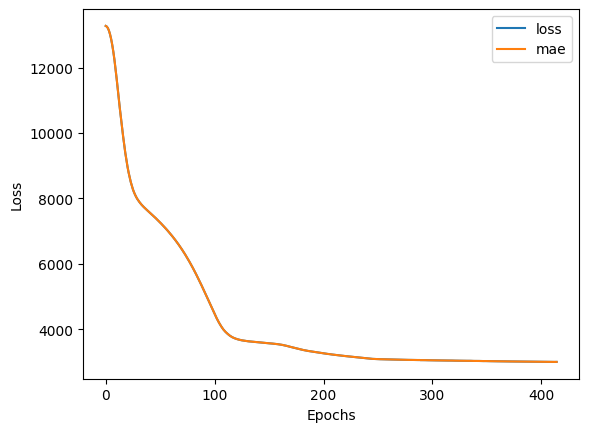

In [56]:
#Increase learning rate

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(1, name="output_layer")
    ])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate =0.01),
              metrics=["mae"])

#Fit the model
history = model.fit(X_train, y_train, epochs=500, verbose=0, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

#Plot
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

#Copy model
model_2 = model

#Note results
results.append(["model_2",
                model.evaluate(X_train, y_train)[0],
                model.evaluate(X_test, y_test)[0]])
results_df = pd.DataFrame(results, columns=["model", "training_loss", "test_loss"])
results_df

##3.3. Model 3

9/9 [==============================] - 0s 2ms/step - loss: 3831.8567 - mae: 3831.8567


,model,training_loss,test_loss
0,model_1,7053.350098,7225.560059
1,model_2,2998.500244,3846.654785
2,model_3,3000.485840,3831.856689


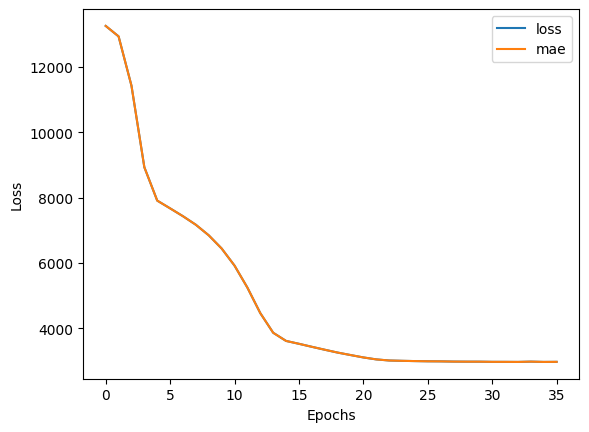

In [57]:
#Add layer to model_2

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(1, name="output_layer")
    ])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate =0.01),
              metrics=["mae"])

#Fit the model
history = model.fit(X_train, y_train, epochs=500, verbose=0, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

#Plot
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

#Copy model
model_3 = model

#Note results
results.append(["model_3",
                model.evaluate(X_train, y_train)[0],
                model.evaluate(X_test, y_test)[0]])
results_df = pd.DataFrame(results, columns=["model", "training_loss", "test_loss"])
results_df

###3.4 Model 4

9/9 [==============================] - 0s 3ms/step - loss: 3787.6638 - mae: 3787.6638


,model,training_loss,test_loss
0,model_1,7053.350098,7225.560059
1,model_2,2998.500244,3846.654785
2,model_3,3000.485840,3831.856689
3,model_4,2946.944092,3787.663818


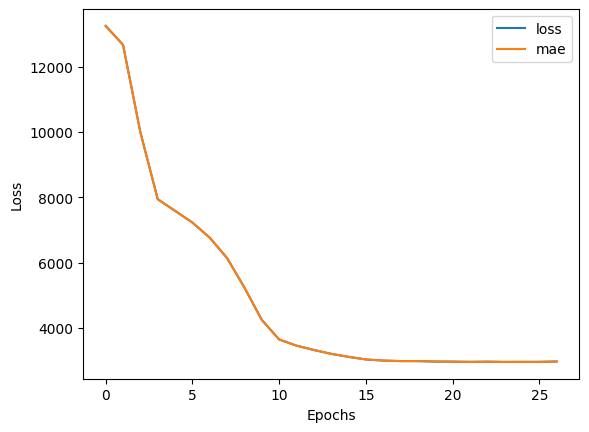

In [58]:
#Add nodes to model 3

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(1, name="output_layer")
    ])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate =0.01),
              metrics=["mae"])

#Fit the model
history = history = model.fit(X_train, y_train, epochs=500, verbose=0, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

#Plot
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

#Copy model
model_4 = model

#Note results
results.append(["model_4",
                model.evaluate(X_train, y_train)[0],
                model.evaluate(X_test, y_test)[0]])
results_df = pd.DataFrame(results, columns=["model", "training_loss", "test_loss"])
results_df

Models 2-4 all very similar, model 3 being marginally the best.

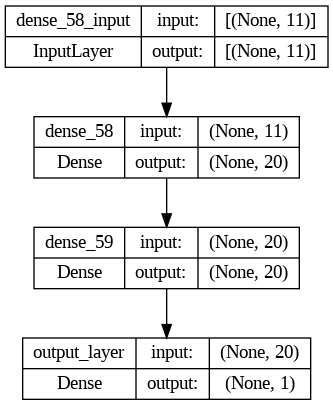

In [59]:
tf.keras.utils.plot_model(model_3, show_shapes = True)